## HW3

In [ ]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from keras.datasets import mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [33]:
x_train = x_train.reshape(60000, 28*28)
print(x_train.shape)

(60000, 784)


### Part I: Implementing PCA

In [34]:
def pca(X):
  
    
    mean = np.mean(X, axis=0)
    
    cov_mat = (X - mean).T.dot((X - mean)) / (X.shape[0]-1)
    
    #The corresponding eigenvalues are in weights
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    
    matrix_w = np.hstack((eig_pairs[0][1].reshape(784,1),#to stack or concatenate arrays in sequence horizontally 
                      eig_pairs[1][1].reshape(784,1),
                      eig_pairs[2][1].reshape(784,1),
                      eig_pairs[3][1].reshape(784,1)))
    
    vectors = X.dot(matrix_w)
    
    vectors[:,0] *= -1
    
    return mean, eig_vals, vectors

### Part II: Using PCA before Classification 

In [72]:
randomlist = np.arange(x_train.shape[0])
np.random.shuffle(randomlist)
#1000 images randomly chosen from the training set
train_X = x_train[randomlist[:1000]]
train_Y = y_train[randomlist[:1000]]

mean, weights, vectors = pca(train_X)

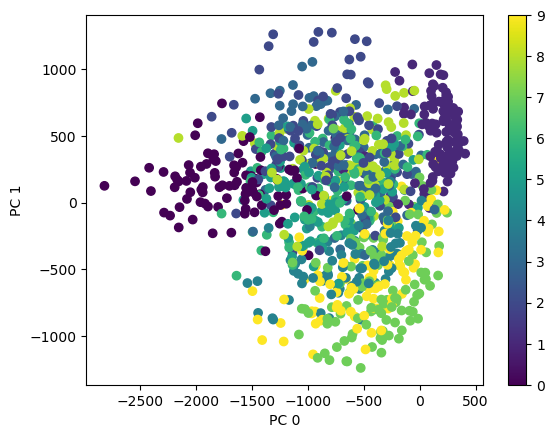

In [73]:
#a 2D map with horizontal axis as the first principal and with vertical axis as the second principal component
#0-1
plt.scatter(vectors[:, 0],vectors[:, 1],c=train_Y)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.colorbar();

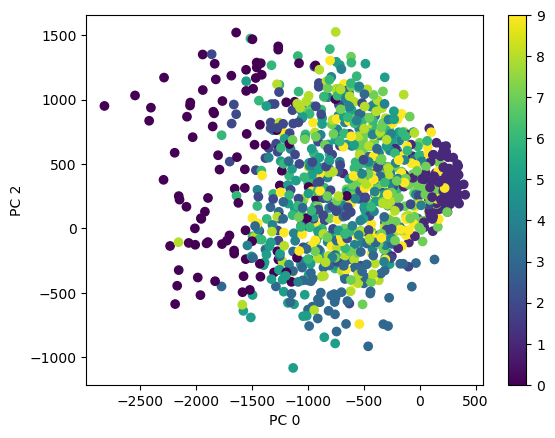

In [74]:
#0-2
plt.scatter(vectors[:, 0],vectors[:, 2],c=train_Y)
plt.xlabel('PC 0')
plt.ylabel('PC 2')
plt.colorbar();

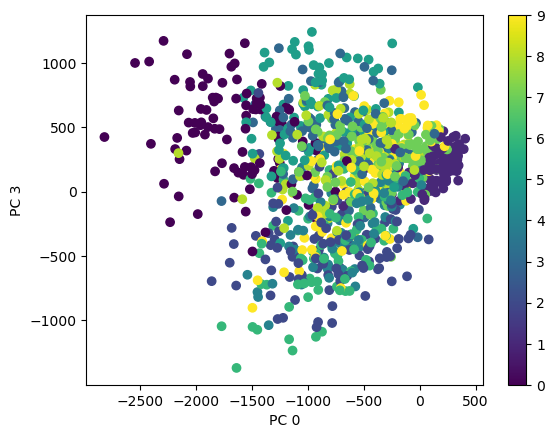

In [75]:
#0-3
plt.scatter(vectors[:, 0],vectors[:,3],c=train_Y)
plt.xlabel('PC 0')
plt.ylabel('PC 3')
plt.colorbar();

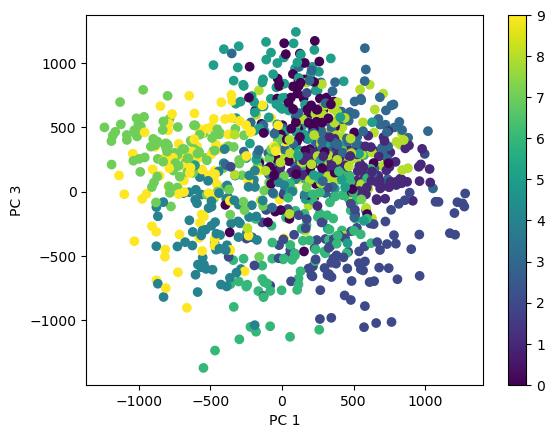

In [76]:
#1-3
plt.scatter(vectors[:, 1],vectors[:, 3],c=train_Y)
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.colorbar();

In [77]:
# Feed the reduced features to a Random Forest Decision tree

kf = KFold(n_splits=5)

mean, weights , vectors = pca(x_train)

for trainIndex, testIndex in kf.split(vectors):
    
    kTrainX, kTestX = vectors[trainIndex], vectors[testIndex]
    kTrainY, kTestY = y_train[trainIndex], y_train[testIndex]
        
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(kTrainX, kTrainY)
    
    predicts = clf.predict(kTestX)
    
    print('Accuracy Score:', accuracy_score(predicts, kTestY))
    

Accuracy Score: 0.4681666666666667
Accuracy Score: 0.45966666666666667
Accuracy Score: 0.45808333333333334
Accuracy Score: 0.45958333333333334
Accuracy Score: 0.47533333333333333


### Part III: Comparing Linear and Non-linear Versions of PCA

In [78]:
from sklearn.decomposition import KernelPCA

kf = KFold(n_splits=5)

kernelPCA = KernelPCA(4)
projected = kernelPCA.fit_transform(train_X)

for trainIndex, testIndex in kf.split(projected):
        
    kTrainX, kTestX = projected[trainIndex], projected[testIndex]
    kTrainY, kTestY = train_Y[trainIndex], train_Y[testIndex]
            
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(kTrainX, kTrainY)
    
    predicts = clf.predict(kTestX)
    
    print('Accuracy Score:', accuracy_score(predicts, kTestY))

Accuracy Score: 0.49
Accuracy Score: 0.495
Accuracy Score: 0.46
Accuracy Score: 0.535
Accuracy Score: 0.46


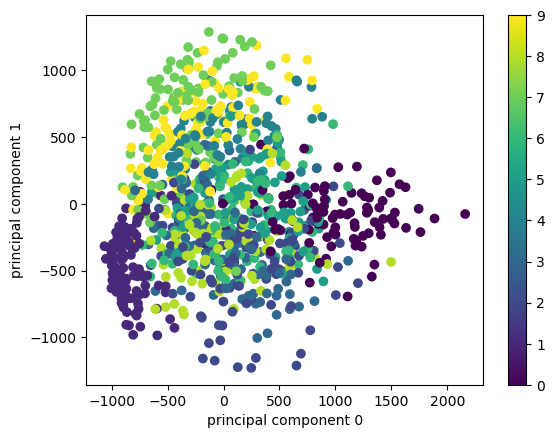

In [79]:
#0-1
plt.scatter(projected[:, 0],projected[:, 1], c=train_Y)
plt.xlabel('principal component 0')
plt.ylabel('principal component 1')
plt.colorbar();

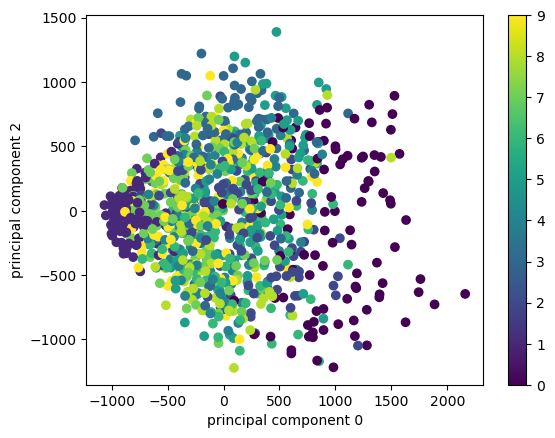

In [80]:
#0-2
plt.scatter(projected[:, 0],projected[:, 2], c=train_Y)
plt.xlabel('principal component 0')
plt.ylabel('principal component 2')
plt.colorbar();

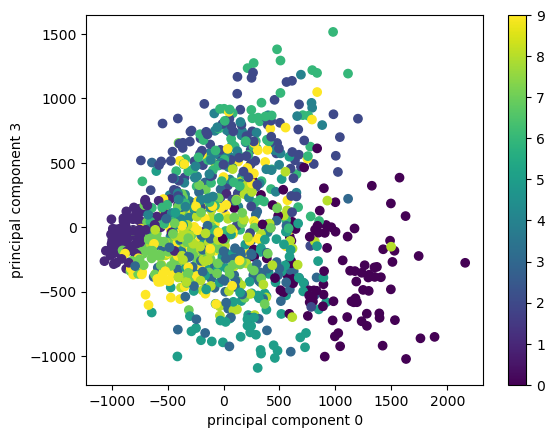

In [81]:
#0-3
plt.scatter(projected[:, 0],projected[:, 3], c=train_Y)
plt.xlabel('principal component 0')
plt.ylabel('principal component 3')
plt.colorbar();

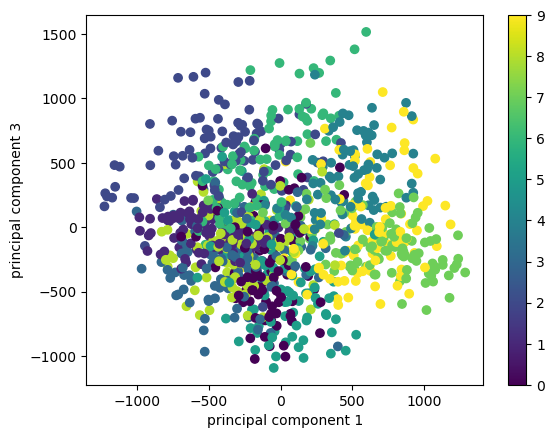

In [82]:
#1-3
plt.scatter(projected[:, 1],projected[:, 3], c=train_Y)
plt.xlabel('principal component 1')
plt.ylabel('principal component 3')
plt.colorbar();